In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [3]:
df = pd.read_csv("train_data.csv")
print(df.head())

        ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  \
0       With par

In [51]:
print("Co-relation between Income and risk Factor \n",df['Income'].corr(df['Is high risk']))
print("Co-relation between Age and risk Factor \n",df['Age'].corr(df['Is high risk']))
print("Co-relation between Employment length and risk Factor \n",df['Employment length'].corr(df['Is high risk']))
print("Co-relation between Account age and risk Factor \n",df['Account age'].corr(df['Is high risk']))

Co-relation between Income and risk Factor 
 -0.001760482881271084
Co-relation between Age and risk Factor 
 0.00242246324921268
Co-relation between Employment length and risk Factor 
 0.005398384917477277
Co-relation between Account age and risk Factor 
 -0.0632727452428411


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [5]:
df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [6]:
df['Job title'].fillna('No',inplace=True)

In [7]:
df.isnull().sum()


ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [33]:
df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [8]:
x = df.iloc[:,1:19].values
y = df.iloc[:,19].values


x
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Gender
F    19549
M     9616
Name: count, dtype: int64


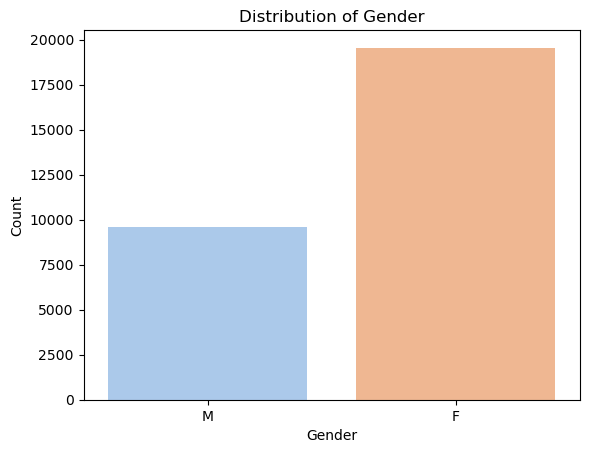

In [9]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()



Marital status
Married                 20044
Single / not married     3864
Civil marriage           2312
Separated                1712
Widow                    1233
Name: count, dtype: int64


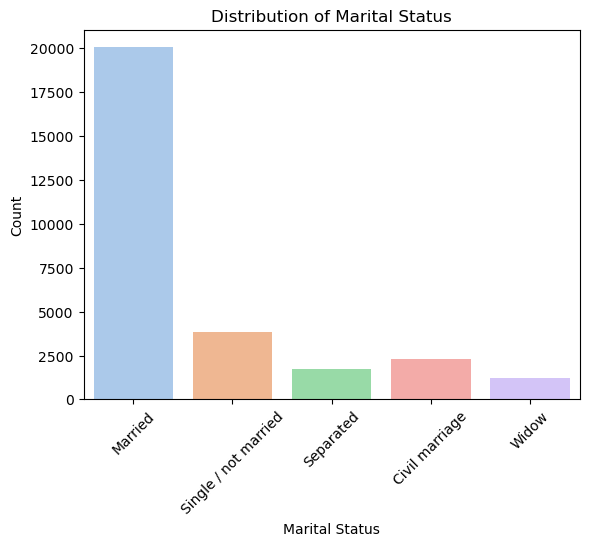

In [14]:
print(df['Marital status'].value_counts())
sns.countplot(x='Marital status', data=df, palette='pastel')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)
plt.show()

Is high risk
0    28666
1      499
Name: count, dtype: int64


<Axes: xlabel='Is high risk', ylabel='count'>

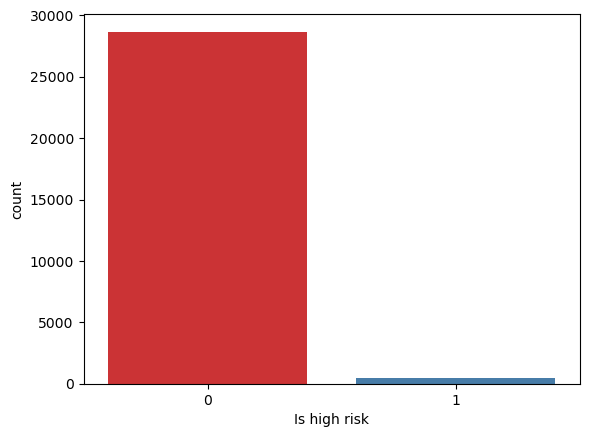

In [41]:
print(df['Is high risk'].value_counts())
sns.countplot(x='Is high risk' , data=df,palette='Set1')

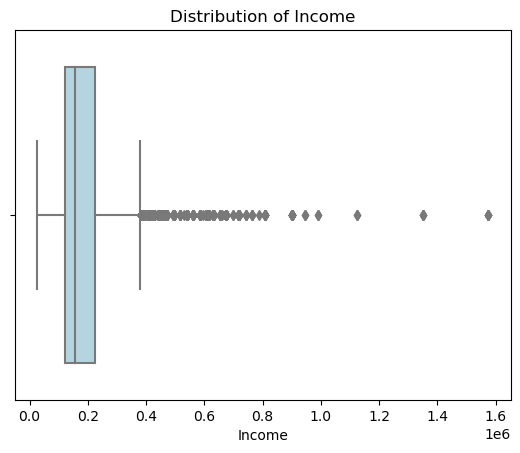

In [12]:
sns.boxplot(x='Income', data=df, color='lightblue')
plt.xlabel('Income')
plt.title('Distribution of Income')
plt.show()

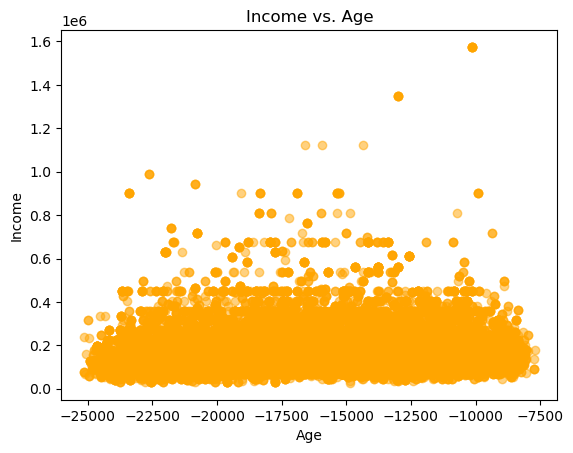

In [16]:
plt.scatter(df['Age'], df['Income'], alpha=0.5, color='orange')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs. Age')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [18]:
X_train = x

In [19]:
X_train[:,0] = Labelencoder_x.fit_transform(X_train[:,2])
X_train[:,1] = Labelencoder_x.fit_transform(X_train[:,3])
X_train[:,2] = Labelencoder_x.fit_transform(X_train[:,4])
X_train[:,5] = Labelencoder_x.fit_transform(X_train[:,7])
X_train[:,6] = Labelencoder_x.fit_transform(X_train[:,8])
X_train[:,7] = Labelencoder_x.fit_transform(X_train[:,9])
X_train[:,8] = Labelencoder_x.fit_transform(X_train[:,10])
X_train[:,15] = Labelencoder_x.fit_transform(X_train[:,17])
    
X_train

array([[1, 0, 101, ..., 43, 2.0, -17.0],
       [0, 1, 101, ..., 59, 2.0, -1.0],
       [1, 2, 141, ..., 22, 4.0, -38.0],
       ...,
       [1, 0, 48, ..., 31, 2.0, -29.0],
       [1, 0, 117, ..., 23, 2.0, -37.0],
       [1, 0, 236, ..., 17, 2.0, -43.0]], dtype=object)

In [20]:
Labelencoder_y = LabelEncoder()
y_train = y
y_train = Labelencoder_y.fit_transform(y_train)

In [21]:
dff = pd.read_csv("test_data.csv")
x_test = dff.iloc[:,1:19].values
y_test = dff.iloc[:,19].values

In [22]:
Labelencoder_x = LabelEncoder()
x_test[:,0] = Labelencoder_x.fit_transform(x_test[:,2])
x_test[:,1] = Labelencoder_x.fit_transform(x_test[:,3])
x_test[:,2] = Labelencoder_x.fit_transform(x_test[:,4])
x_test[:,5] = Labelencoder_x.fit_transform(x_test[:,7])
x_test[:,6] = Labelencoder_x.fit_transform(x_test[:,8])
x_test[:,7] = Labelencoder_x.fit_transform(x_test[:,9])
x_test[:,8] = Labelencoder_x.fit_transform(x_test[:,10])
x_test[:,15] = Labelencoder_x.fit_transform(x_test[:,17])
    
x_test

array([[1, 0, 104, ..., 54, 1.0, -6.0],
       [0, 0, 179, ..., 44, 2.0, -16.0],
       [0, 0, 115, ..., 8, 2.0, -52.0],
       ...,
       [1, 0, 26, ..., 35, 1.0, -25.0],
       [0, 0, 45, ..., 11, 2.0, -49.0],
       [1, 1, 71, ..., 24, 3.0, -36.0]], dtype=object)

In [23]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

In [24]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.transform(x_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
from sklearn import metrics
y_pred = rf_clf.predict(x_test)

print("accuracy of random forest clf is",metrics.accuracy_score(y_pred,y_test))
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print("confusion_matrix \n",cm)

accuracy of random forest clf is 0.9839550191991223
confusion_matrix 
 [[7175    0]
 [ 117    0]]


In [53]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [71]:
y_pred = nb_clf.predict(x_test)
print("Accuracy of GaussianNB is ",metrics.accuracy_score(y_pred,y_test))
cm= confusion_matrix(y_test, y_pred) 
print("confusion_matrix \n",cm)

Accuracy of GaussianNB is  0.9838178826110806
confusion_matrix 
 [[7174    1]
 [ 117    0]]


In [60]:
from sklearn.tree import DecisionTreeClassifier
df_clf = DecisionTreeClassifier()
df_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred = df_clf.predict(x_test)

print("Accuracy of decision tree clf is",metrics.accuracy_score(y_pred,y_test))
cm= confusion_matrix(y_test, y_pred) 
print("confusion_matrix \n",cm)

Accuracy of decision tree clf is 0.867937465715853
confusion_matrix 
 [[6307  868]
 [  95   22]]


In [62]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred = kn_clf.predict(x_test)
print("Accuracy of KNeighborsClassifier clf is",metrics.accuracy_score(y_pred,y_test))
cm= confusion_matrix(y_test, y_pred) 
print("confusion_matrix \n",cm)

Accuracy of KNeighborsClassifier clf is 0.9834064728469556
confusion_matrix 
 [[7171    4]
 [ 117    0]]


In [73]:
feature_importance = rf_clf.feature_importances_
feature_importance

array([0.01502678, 0.01262241, 0.06476962, 0.01331366, 0.06626519,
       0.02919797, 0.01423783, 0.14697381, 0.10924689, 0.14523732,
       0.11074424, 0.        , 0.0121319 , 0.01451335, 0.00720755,
       0.10735754, 0.02698899, 0.10416494])

In [ ]:
feature_names = ['Feature1', 'Feature2', ..., 'FeatureN']  # Replace with your actual feature names

feature_importance_scores = feature_importance  # Replace with your actual feature importance scores

# Pair feature names with their importance scores
feature_importance_pairs = zip(feature_names, feature_importance_scores)

# Print feature names and their importance scores
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")